### Data Analysis for CSI frame data

This notebook constructs some visualisations of the CSV data obtained from the raw CSI data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('anechoic_chamber_data.csv')
df = df.drop(['Frame ID'],axis=1)

In [3]:
df.head()

,csi_1real,csi_1imag,csi_2real,csi_2imag,csi_3real,csi_3imag,csi_4real,csi_4imag,csi_5real,csi_5imag,...,csi_125real,csi_125imag,csi_126real,csi_126imag,csi_127real,csi_127imag,csi_128real,csi_128imag,channel,distance
0,124,-64,7,0,17,12,17,11,16,10,...,35,23,34,23,33,25,32,26,11,250
1,30,-32,1,0,-8,21,-7,21,-7,21,...,39,-25,38,-24,38,-22,38,-21,11,250
2,30,-32,1,0,21,11,21,10,22,9,...,39,30,39,29,39,29,39,29,11,250
3,116,64,7,0,-18,12,-18,12,-16,12,...,29,-33,30,-32,31,-30,30,-29,11,250
4,82,32,5,0,6,22,7,22,7,21,...,46,8,45,9,44,1,0,42,11,250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Columns: 258 entries, csi_1real to distance
dtypes: int64(258)
memory usage: 725.7 KB


In [5]:
df.describe()

,csi_1real,csi_1imag,csi_2real,csi_2imag,csi_3real,csi_3imag,csi_4real,csi_4imag,csi_5real,csi_5imag,...,csi_125real,csi_125imag,csi_126real,csi_126imag,csi_127real,csi_127imag,csi_128real,csi_128imag,channel,distance
count,360.000000,360.000000,360.000000,360.0,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,...,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,81.944444,-1.600000,4.544444,0.0,-0.605556,0.208333,-0.602778,0.172222,-0.544444,0.113889,...,0.675000,-1.522222,0.655556,-1.275000,0.288889,-0.733333,0.166667,-0.547222,5.319444,164.694444
std,41.197834,53.954856,2.751191,0.0,12.519176,11.874151,12.411940,11.795061,12.276445,11.598474,...,27.443788,27.323188,26.172520,24.161929,23.823747,23.025867,23.327748,22.930025,4.022314,80.845401
min,30.000000,-64.000000,1.000000,0.0,-25.000000,-25.000000,-25.000000,-26.000000,-24.000000,-25.000000,...,-47.000000,-49.000000,-48.000000,-49.000000,-49.000000,-48.000000,-48.000000,-46.000000,1.000000,50.000000
25%,30.000000,-32.000000,1.000000,0.0,-9.000000,-4.250000,-8.000000,-5.000000,-8.250000,-4.250000,...,-24.250000,-26.000000,-22.000000,-17.250000,-14.000000,-13.000000,-11.000000,-12.500000,1.000000,50.000000
50%,82.000000,-32.000000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,-3.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,185.000000
75%,118.250000,64.000000,7.000000,0.0,6.000000,9.000000,7.000000,8.000000,7.000000,7.000000,...,27.000000,25.000000,25.250000,16.000000,17.000000,8.750000,16.000000,10.500000,11.000000,250.000000
max,124.000000,112.000000,7.000000,0.0,25.000000,23.000000,24.000000,23.000000,24.000000,23.000000,...,46.000000,47.000000,46.000000,46.000000,46.000000,46.000000,45.000000,45.000000,11.000000,250.000000


In [6]:
df.columns

Index(['csi_1real', 'csi_1imag', 'csi_2real', 'csi_2imag', 'csi_3real',
       'csi_3imag', 'csi_4real', 'csi_4imag', 'csi_5real', 'csi_5imag',
       ...
       'csi_125real', 'csi_125imag', 'csi_126real', 'csi_126imag',
       'csi_127real', 'csi_127imag', 'csi_128real', 'csi_128imag', 'channel',
       'distance'],
      dtype='object', length=258)

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


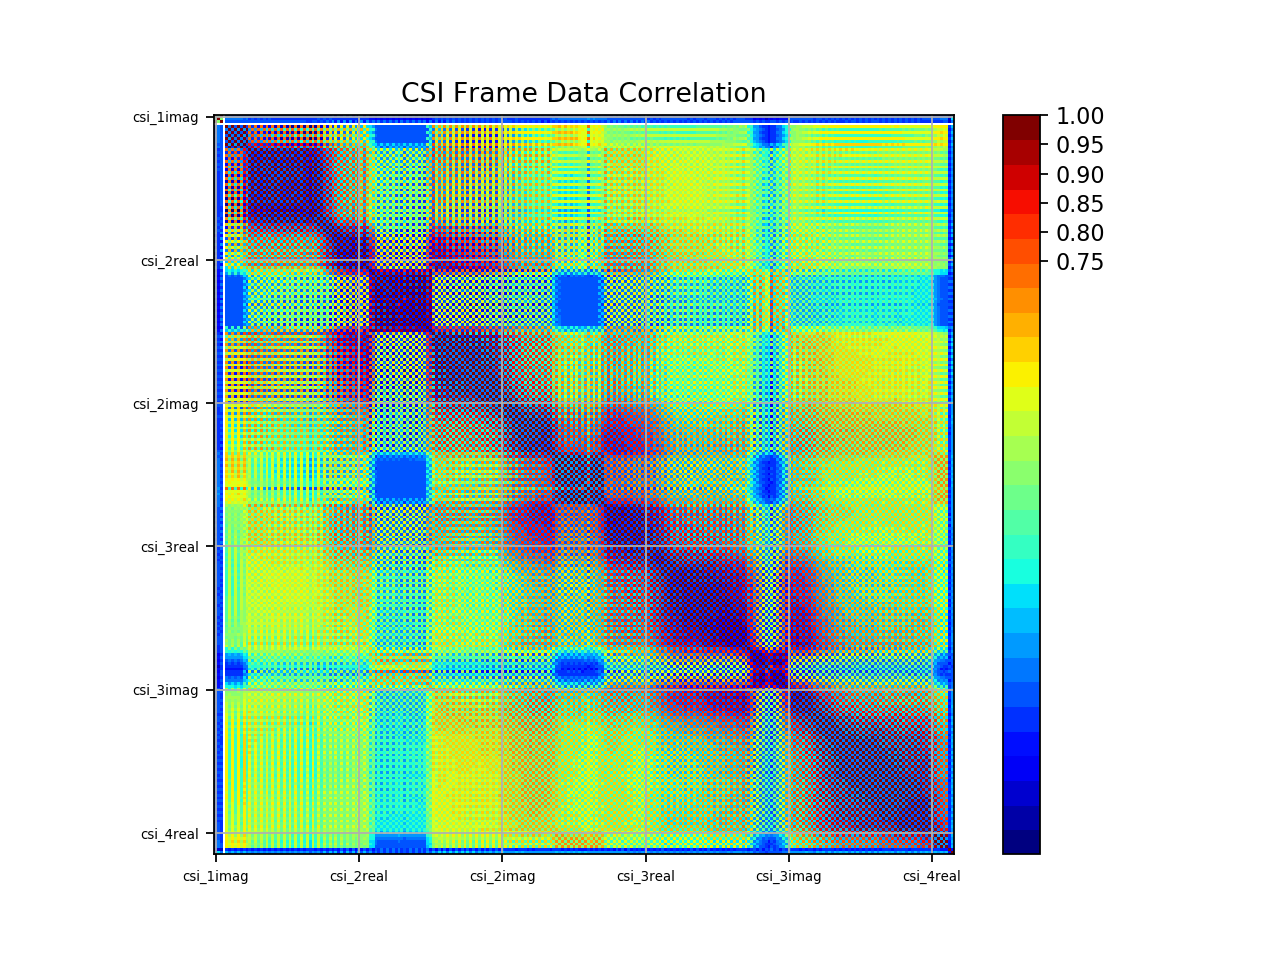

In [8]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('CSI Frame Data Correlation')
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()
    
correlation_matrix(df)

<Figure size 640x480 with 2 Axes>